In [8]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# File to Load
school_data_to_load = ("Resources/schools_complete.csv")
student_data_to_load = ("Resources/students_complete.csv")

In [10]:
# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

In [11]:
student_data.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [12]:
school_data.head()

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [13]:
# Combine the data into a single dataset
data = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
data.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [14]:
################################### DISTRICT SUMMARY #########################################

In [15]:
data.count()

Student ID       39170
student_name     39170
gender           39170
grade            39170
school_name      39170
reading_score    39170
math_score       39170
School ID        39170
type             39170
size             39170
budget           39170
dtype: int64

In [16]:
data.dtypes

Student ID        int64
student_name     object
gender           object
grade            object
school_name      object
reading_score     int64
math_score        int64
School ID         int64
type             object
size              int64
budget            int64
dtype: object

In [17]:
data.shape

(39170, 11)

In [18]:
totscls = len(data["school_name"].unique())
totscls

15

In [19]:
totstud = len(data["Student ID"].unique())
totstud

39170

In [20]:
avgbud = data.groupby(["school_name"])["budget"].mean().to_frame()
avgbud = avgbud.reset_index()
avgbud


,school_name,budget
0,Bailey High School,3124928
1,Cabrera High School,1081356
2,Figueroa High School,1884411
3,Ford High School,1763916
4,Griffin High School,917500
5,Hernandez High School,3022020
6,Holden High School,248087
7,Huang High School,1910635
8,Johnson High School,3094650
9,Pena High School,585858


In [21]:
totbud = avgbud["budget"].sum()
totbud

24649428

In [22]:
avgmath = data["math_score"].mean()
avgmath

78.98537145774827

In [23]:
avgread = data["reading_score"].mean()
avgread

81.87784018381414

In [24]:
data["reading_score"].min()

63

In [25]:
data["reading_score"].max()

99

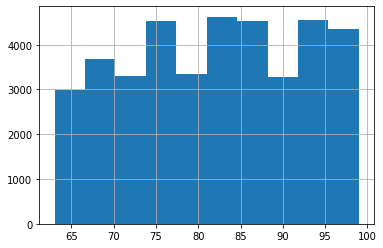

In [26]:
data["reading_score"].hist()

In [27]:
data["math_score"].min()

55

In [28]:
data["math_score"].max()

99

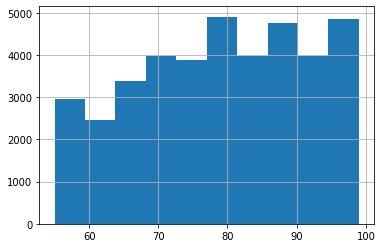

In [29]:
data["math_score"].hist()

In [30]:
passread = data.loc[data["reading_score"] >= 70, :]
passread.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635


In [31]:
countread = len(passread["Student ID"].value_counts())
countread

33610

In [32]:
perpassread = (countread / 39170) *100
perpassread

85.80546336482001

In [33]:
passmath = data.loc[data["math_score"] >= 70, :]
passmath.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635


In [34]:
countmath = len(passmath["Student ID"].value_counts())
countmath

29370

In [35]:
perpassmath = (countmath / 39170) * 100
perpassmath

74.9808526933878

In [36]:
overallpass = (perpassmath + perpassread)/2
overallpass

80.39315802910392

In [37]:
summary_table_district = pd.DataFrame({"Total Schools" : [totscls], 
                                      "Total Students" : [totstud],
                                      "Total Budget" : [totbud],
                                      "Average Math Score" : [avgmath],
                                      "Average Reading Score" : [avgread],
                                      "% Passing Math" : [perpassmath],
                                      "% Passing Reading" : [perpassread],
                                      "Overall Passing Rate" : [overallpass]})
summary_table_district

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,80.393158


In [38]:
summary_table_district["Total Students"] = pd.to_numeric(summary_table_district["Total Students"])
summary_table_district["Total Budget"] = pd.to_numeric(summary_table_district["Total Budget"])
#summary_table_district["% Passing Math"] = pd.to_numeric(summary_table_district["% Passing Math"])
#summary_table_district["% Passing Reading"] = pd.to_numeric(summary_table_district["% Passing Reading"])
summary_table_district

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,80.393158


In [39]:
summary_table_district["Total Students"] = summary_table_district["Total Students"].map("{:,}".format)
summary_table_district["Total Budget"] = summary_table_district["Total Budget"].map("${:,.2f}".format)
#summary_table_district["% Passing Math"] = summary_table_district["% Passing Math"].map("{0:,.2f}%".format)
#summary_table_district["% Passing Reading"] = summary_table_district["% Passing Reading"].map("{0:,.2f}%".format)
summary_table_district

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,80.393158


In [40]:
################################### SCHOOL SUMMARY #########################################

In [41]:
schlgrp = data.groupby(["school_name"])
schlgrp.count().head(5) 

,Student ID,student_name,gender,grade,reading_score,math_score,School ID,type,size,budget
school_name,,,,,,,,,,
Bailey High School,4976,4976,4976,4976,4976,4976,4976,4976,4976,4976
Cabrera High School,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858
Figueroa High School,2949,2949,2949,2949,2949,2949,2949,2949,2949,2949
Ford High School,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739
Griffin High School,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468


In [42]:
Tot_Stud = data.groupby(["school_name"]).count()["Student ID"]
Tot_Stud

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: Student ID, dtype: int64

In [43]:
Tot_Bud = data.groupby(["school_name"]).mean()["budget"]
Tot_Bud.head(5)

school_name
Bailey High School      3124928.0
Cabrera High School     1081356.0
Figueroa High School    1884411.0
Ford High School        1763916.0
Griffin High School      917500.0
Name: budget, dtype: float64

In [44]:
Stud_Bud = Tot_Bud / Tot_Stud
Tot_Bud.head(5)

school_name
Bailey High School      3124928.0
Cabrera High School     1081356.0
Figueroa High School    1884411.0
Ford High School        1763916.0
Griffin High School      917500.0
Name: budget, dtype: float64

In [45]:
Avg_Math = data.groupby(["school_name"]).mean()["math_score"]
Avg_Math.head(5)

school_name
Bailey High School      77.048432
Cabrera High School     83.061895
Figueroa High School    76.711767
Ford High School        77.102592
Griffin High School     83.351499
Name: math_score, dtype: float64

In [46]:
Avg_Read = data.groupby(["school_name"]).mean()["reading_score"]
Avg_Read.head(5)

school_name
Bailey High School      81.033963
Cabrera High School     83.975780
Figueroa High School    81.158020
Ford High School        80.746258
Griffin High School     83.816757
Name: reading_score, dtype: float64

In [47]:
PMath = passmath.groupby(["school_name"]).count()["Student ID"]
PMath.head()

school_name
Bailey High School      3318
Cabrera High School     1749
Figueroa High School    1946
Ford High School        1871
Griffin High School     1371
Name: Student ID, dtype: int64

In [48]:
Per_Pass_Math = (PMath / Tot_Stud) *100

In [49]:
PRead = passread.groupby(["school_name"]).count()["Student ID"]
PRead.head()

school_name
Bailey High School      4077
Cabrera High School     1803
Figueroa High School    2381
Ford High School        2172
Griffin High School     1426
Name: Student ID, dtype: int64

In [50]:
Per_Pass_Read = (PRead / Tot_Stud) * 100

In [51]:
Overall_Pass_Rate = (Per_Pass_Math + Per_Pass_Read) / 2

In [52]:
School_NameType = school_data.set_index(["school_name"])["type"]

In [53]:
School_Summary = pd.DataFrame({"School Type" : School_NameType,
                                      "Total Students" : Tot_Stud,
                                      "Total School Budget" : Tot_Bud,
                                      "Per Student Budget" : Stud_Bud,
                                      "Average Math Score" : Avg_Math,
                                      "Average Reading Score" : Avg_Read,
                                      "% Passing Math" : Per_Pass_Math,
                                      "% Passing Reading" : Per_Pass_Read,
                                      "Overall Passing Rate" : Overall_Pass_Rate
                                    })
School_Summary.head(15)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Bailey High School,District,4976,3124928.0,628.0,77.048432,81.033963,66.680064,81.933280,74.306672
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,73.804308
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Hernandez High School,District,4635,3022020.0,652.0,77.289752,80.934412,66.752967,80.862999,73.807983
Holden High School,Charter,427,248087.0,581.0,83.803279,83.814988,92.505855,96.252927,94.379391
Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,73.639992
Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,95.270270


In [54]:
#################### TOP PERFORMING SCHOOLS ###################################

In [55]:
top_df = School_Summary.sort_values("Overall Passing Rate", ascending = False)
top_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,Charter,1635,1043130.0,638.0,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Charter,2283,1319574.0,578.0,83.274201,83.989488,93.867718,96.539641,95.203679


In [56]:
p = top_df.index.values
top_df.insert( 0, column="School Name",value = p)
top_df.head()

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Cabrera High School,Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,Thomas High School,Charter,1635,1043130.0,638.0,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Wilson High School,Charter,2283,1319574.0,578.0,83.274201,83.989488,93.867718,96.539641,95.203679


In [57]:
top_df = top_df.reset_index(drop=True)
top_df.head()

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
1,Thomas High School,Charter,1635,1043130.0,638.0,83.418349,83.848930,93.272171,97.308869,95.290520
2,Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,95.270270
3,Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
4,Wilson High School,Charter,2283,1319574.0,578.0,83.274201,83.989488,93.867718,96.539641,95.203679


In [58]:
top_table = top_df.loc[0:4, :]
top_table

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
1,Thomas High School,Charter,1635,1043130.0,638.0,83.418349,83.848930,93.272171,97.308869,95.290520
2,Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,95.270270
3,Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
4,Wilson High School,Charter,2283,1319574.0,578.0,83.274201,83.989488,93.867718,96.539641,95.203679


In [59]:
top_table = top_table.set_index("School Name")
top_table.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Name,,,,,,,,,
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,Charter,1635,1043130.0,638.0,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Charter,2283,1319574.0,578.0,83.274201,83.989488,93.867718,96.539641,95.203679


In [60]:
################# BOTTOM PERFORMING SCHOOLS ###############################

In [61]:
bottom_df = School_Summary.sort_values("Overall Passing Rate")
bottom_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Rodriguez High School,District,3999,2547363.0,637.0,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,73.804308


In [62]:
p = bottom_df.index.values
bottom_df.insert(0, column="School Name",value = p)
bottom_df.head()

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Rodriguez High School,Rodriguez High School,District,3999,2547363.0,637.0,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,73.804308


In [63]:
bottom_df = bottom_df.reset_index(drop=True)
bottom_df.head()

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,Rodriguez High School,District,3999,2547363.0,637.0,76.842711,80.744686,66.366592,80.220055,73.293323
1,Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
2,Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
3,Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,73.639992
4,Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,73.804308


In [64]:
bottom_table = bottom_df.loc[0:4, :]
bottom_table

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,Rodriguez High School,District,3999,2547363.0,637.0,76.842711,80.744686,66.366592,80.220055,73.293323
1,Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
2,Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
3,Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,73.639992
4,Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,73.804308


In [65]:
bottom_table = bottom_table.set_index("School Name")
bottom_table.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Name,,,,,,,,,
Rodriguez High School,District,3999,2547363.0,637.0,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,73.804308


In [66]:
################## MATH SCORES BY GRADE ############################

In [67]:
student_data.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [68]:
grade9 = student_data.loc[student_data["grade"] == "9th", ["school_name", "math_score"]]
print(grade9)
print()

              school_name  math_score
0       Huang High School          79
4       Huang High School          84
5       Huang High School          94
12      Huang High School          79
13      Huang High School          79
...                   ...         ...
39152  Thomas High School          84
39153  Thomas High School          75
39157  Thomas High School          94
39164  Thomas High School          76
39167  Thomas High School          84

[11408 rows x 2 columns]



In [69]:
grade10 = student_data.loc[student_data["grade"] == "10th", ["school_name", "math_score"]]
print(grade10)
print()

              school_name  math_score
8       Huang High School          87
9       Huang High School          84
10      Huang High School          70
11      Huang High School          77
14      Huang High School          67
...                   ...         ...
39155  Thomas High School          98
39158  Thomas High School          90
39161  Thomas High School          84
39166  Thomas High School          70
39168  Thomas High School          90

[10168 rows x 2 columns]



In [70]:
grade11 = student_data.loc[student_data["grade"] == "11th", ["school_name", "math_score"]]
print(grade11)
print()

              school_name  math_score
6       Huang High School          80
15      Huang High School          88
22      Huang High School          84
24      Huang High School          73
28      Huang High School          55
...                   ...         ...
39156  Thomas High School          95
39159  Thomas High School          72
39160  Thomas High School          86
39163  Thomas High School          75
39169  Thomas High School          75

[9695 rows x 2 columns]



In [71]:
grade12 = student_data.loc[student_data["grade"] == "12th", ["school_name", "math_score"]]
print(grade12)
print()

              school_name  math_score
1       Huang High School          61
2       Huang High School          60
3       Huang High School          58
7       Huang High School          69
29      Huang High School          88
...                   ...         ...
39137  Thomas High School          70
39144  Thomas High School          87
39154  Thomas High School          71
39162  Thomas High School          77
39165  Thomas High School          90

[7899 rows x 2 columns]



In [72]:
grade9 = grade9.groupby(["school_name"]).mean()
print(grade9)
print

                       math_score
school_name                      
Bailey High School      77.083676
Cabrera High School     83.094697
Figueroa High School    76.403037
Ford High School        77.361345
Griffin High School     82.044010
Hernandez High School   77.438495
Holden High School      83.787402
Huang High School       77.027251
Johnson High School     77.187857
Pena High School        83.625455
Rodriguez High School   76.859966
Shelton High School     83.420755
Thomas High School      83.590022
Wilson High School      83.085578
Wright High School      83.264706


<function print>

In [73]:
grade10 = grade10.groupby(["school_name"]).mean()
grade11 = grade11.groupby(["school_name"]).mean()
grade12 = grade12.groupby(["school_name"]).mean()

In [74]:
merge1_df = pd.merge(grade9, grade10, on="school_name", suffixes=("_Grade 9", "_Grade 10"))
merge1_df

,math_score_Grade 9,math_score_Grade 10
school_name,,
Bailey High School,77.083676,76.996772
Cabrera High School,83.094697,83.154506
Figueroa High School,76.403037,76.539974
Ford High School,77.361345,77.672316
Griffin High School,82.044010,84.229064
Hernandez High School,77.438495,77.337408
Holden High School,83.787402,83.429825
Huang High School,77.027251,75.908735
Johnson High School,77.187857,76.691117


In [75]:
merge2_df = pd.merge(merge1_df, grade11, on="school_name", suffixes=("_Grade 10","_Grade 11"))
merge2_df

,math_score_Grade 9,math_score_Grade 10,math_score
school_name,,,
Bailey High School,77.083676,76.996772,77.515588
Cabrera High School,83.094697,83.154506,82.765560
Figueroa High School,76.403037,76.539974,76.884344
Ford High School,77.361345,77.672316,76.918058
Griffin High School,82.044010,84.229064,83.842105
Hernandez High School,77.438495,77.337408,77.136029
Holden High School,83.787402,83.429825,85.000000
Huang High School,77.027251,75.908735,76.446602
Johnson High School,77.187857,76.691117,77.491653


In [76]:
math_by_grade = pd.merge(merge2_df, grade12, on="school_name")
math_by_grade

,math_score_Grade 9,math_score_Grade 10,math_score_x,math_score_y
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


In [77]:
math_by_grade = math_by_grade.rename(columns={"math_score_Grade 9":"Grade 9", 
                                              "math_score_Grade 10":"Grade 10",
                                              "math_score_x":"Grade 11",
                                              "math_score_y":"Grade 12"})
math_by_grade

,Grade 9,Grade 10,Grade 11,Grade 12
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


In [78]:
############# READING SCORES BY GRADE ############################

In [79]:
grade9r = student_data.loc[student_data["grade"] == "9th", ["school_name", "reading_score"]]
grade10r = student_data.loc[student_data["grade"] == "10th", ["school_name", "reading_score"]]
grade11r = student_data.loc[student_data["grade"] == "11th", ["school_name", "reading_score"]]
grade12r = student_data.loc[student_data["grade"] == "12th", ["school_name", "reading_score"]]

In [80]:
grade9r = grade9r.groupby(["school_name"]).mean()
grade10r = grade10r.groupby(["school_name"]).mean()
grade11r = grade11r.groupby(["school_name"]).mean()
grade12r = grade12r.groupby(["school_name"]).mean()

In [81]:
merge1r_df = pd.merge(grade9r, grade10r, on="school_name", suffixes=("_Grade 9", "_Grade 10"))
merge2r_df = pd.merge(merge1r_df, grade11r, on="school_name")
reading_by_grade = pd.merge(merge2r_df, grade12r, on="school_name")
reading_by_grade

,reading_score_Grade 9,reading_score_Grade 10,reading_score_x,reading_score_y
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


In [82]:
reading_by_grade = reading_by_grade.rename(columns={"reading_score_Grade 9":"Grade 9", 
                                                      "reading_score_Grade 10":"Grade 10",
                                                      "reading_score_x":"Grade 11",
                                                      "reading_score_y":"Grade 12"})
                                                    
reading_by_grade

,Grade 9,Grade 10,Grade 11,Grade 12
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


In [83]:
#################### Scores by School Spending #############################

In [84]:
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]

In [85]:
School_Summary.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Bailey High School,District,4976,3124928.0,628.0,77.048432,81.033963,66.680064,81.933280,74.306672
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,73.804308
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,95.265668


In [86]:
School_Summary["Spending Ranges (Per Student)"] = pd.cut(School_Summary["Per Student Budget"], spending_bins, labels=group_names, include_lowest=True)
School_Summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate,Spending Ranges (Per Student)
Bailey High School,District,4976,3124928.0,628.0,77.048432,81.033963,66.680064,81.933280,74.306672,$615-645
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,95.586652,<$585
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,73.363852,$615-645
Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,73.804308,$615-645
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,95.265668,$615-645
Hernandez High School,District,4635,3022020.0,652.0,77.289752,80.934412,66.752967,80.862999,73.807983,$645-675
Holden High School,Charter,427,248087.0,581.0,83.803279,83.814988,92.505855,96.252927,94.379391,<$585
Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,73.500171,$645-675
Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,73.639992,$645-675
Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,95.270270,$585-615


In [87]:
Avg_Math_Bud = School_Summary.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
Avg_Math_Bud

Spending Ranges (Per Student)
<$585       83.455399
$585-615    83.599686
$615-645    79.079225
$645-675    76.997210
Name: Average Math Score, dtype: float64

In [88]:
Avg_Read_Bud = School_Summary.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
Avg_Read_Bud

Spending Ranges (Per Student)
<$585       83.933814
$585-615    83.885211
$615-645    81.891436
$645-675    81.027843
Name: Average Reading Score, dtype: float64

In [89]:
Per_Pass_Math_Bud = School_Summary.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
Per_Pass_Math_Bud

Spending Ranges (Per Student)
<$585       93.460096
$585-615    94.230858
$615-645    75.668212
$645-675    66.164813
Name: % Passing Math, dtype: float64

In [90]:
Per_Pass_Read_Bud = School_Summary.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
Per_Pass_Read_Bud

Spending Ranges (Per Student)
<$585       96.610877
$585-615    95.900287
$615-645    86.106569
$645-675    81.133951
Name: % Passing Reading, dtype: float64

In [91]:
Overall_Pass_Bud = School_Summary.groupby(["Spending Ranges (Per Student)"]).mean()["Overall Passing Rate"]
Overall_Pass_Bud

Spending Ranges (Per Student)
<$585       95.035486
$585-615    95.065572
$615-645    80.887391
$645-675    73.649382
Name: Overall Passing Rate, dtype: float64

In [94]:
Bud_Cat = School_Summary.groupby(["Spending Ranges (Per Student)"])

In [96]:
Per_Stud_Summary = pd.DataFrame({"Average Math Score" : Avg_Math_Bud,
                                "Average Reading Score" : Avg_Read_Bud,
                                "% Passing Math" : Per_Pass_Math_Bud,
                                "% Passing Reading" : Per_Pass_Read_Bud,
                                "Overall Passing Rate" : Overall_Pass_Bud
                                    })
Per_Stud_Summary.head(15)

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,95.035486
$585-615,83.599686,83.885211,94.230858,95.900287,95.065572
$615-645,79.079225,81.891436,75.668212,86.106569,80.887391
$645-675,76.997210,81.027843,66.164813,81.133951,73.649382


In [ ]:
################ Scores by School Size #####################################

In [97]:
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [98]:
School_Summary["School Size"] = pd.cut(School_Summary["Total Students"], size_bins, labels=group_names, include_lowest=True)
School_Summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate,Spending Ranges (Per Student),School Size
Bailey High School,District,4976,3124928.0,628.0,77.048432,81.033963,66.680064,81.933280,74.306672,$615-645,Large (2000-5000)
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,95.586652,<$585,Medium (1000-2000)
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,73.363852,$615-645,Large (2000-5000)
Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,73.804308,$615-645,Large (2000-5000)
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,95.265668,$615-645,Medium (1000-2000)
Hernandez High School,District,4635,3022020.0,652.0,77.289752,80.934412,66.752967,80.862999,73.807983,$645-675,Large (2000-5000)
Holden High School,Charter,427,248087.0,581.0,83.803279,83.814988,92.505855,96.252927,94.379391,<$585,Small (<1000)
Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,73.500171,$645-675,Large (2000-5000)
Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,73.639992,$645-675,Large (2000-5000)
Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,95.270270,$585-615,Small (<1000)


In [99]:
Avg_Math_Size = School_Summary.groupby(["School Size"]).mean()["Average Math Score"]
Avg_Read_Size = School_Summary.groupby(["School Size"]).mean()["Average Reading Score"]
Per_Pass_Math_Size = School_Summary.groupby(["School Size"]).mean()["% Passing Math"]
Per_Pass_Read_Size = School_Summary.groupby(["School Size"]).mean()["% Passing Reading"]
Overall_Pass_Size = School_Summary.groupby(["School Size"]).mean()["Overall Passing Rate"]

In [100]:
Size_Summary = pd.DataFrame({"Average Math Score" : Avg_Math_Size,
                                "Average Reading Score" : Avg_Read_Size,
                                "% Passing Math" : Per_Pass_Math_Size,
                                "% Passing Reading" : Per_Pass_Read_Size,
                                "Overall Passing Rate" : Overall_Pass_Size
                                    })
Size_Summary.head(15)

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,95.195187
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,76.364998


In [ ]:
########################## SCHOOL TYPE ##############################

In [101]:
Avg_Math_Type = School_Summary.groupby(["School Type"]).mean()["Average Math Score"]
Avg_Read_Type = School_Summary.groupby(["School Type"]).mean()["Average Reading Score"]
Per_Pass_Math_Type = School_Summary.groupby(["School Type"]).mean()["% Passing Math"]
Per_Pass_Read_Type = School_Summary.groupby(["School Type"]).mean()["% Passing Reading"]
Overall_Pass_Type = School_Summary.groupby(["School Type"]).mean()["Overall Passing Rate"]

In [103]:
Type_Summary = pd.DataFrame({"Average Math Score" : Avg_Math_Type,
                                "Average Reading Score" : Avg_Read_Type,
                                "% Passing Math" : Per_Pass_Math_Type,
                                "% Passing Reading" : Per_Pass_Read_Type,
                                "Overall Passing Rate" : Overall_Pass_Type
                                    })
Type_Summary.head(15)

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,95.103660
District,76.956733,80.966636,66.548453,80.799062,73.673757
